In [633]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [634]:
mode = 0


In [635]:
df_data = pd.read_csv("/workspaces/python-env/work/data/Sensor2.csv", header=None, delimiter='\t', parse_dates=True)
# df_data = pd.read_csv('/workspaces/python-env/work/data/sample_data.txt', header=None, delimiter='\t', parse_dates=True)
df_data.shape


(250, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


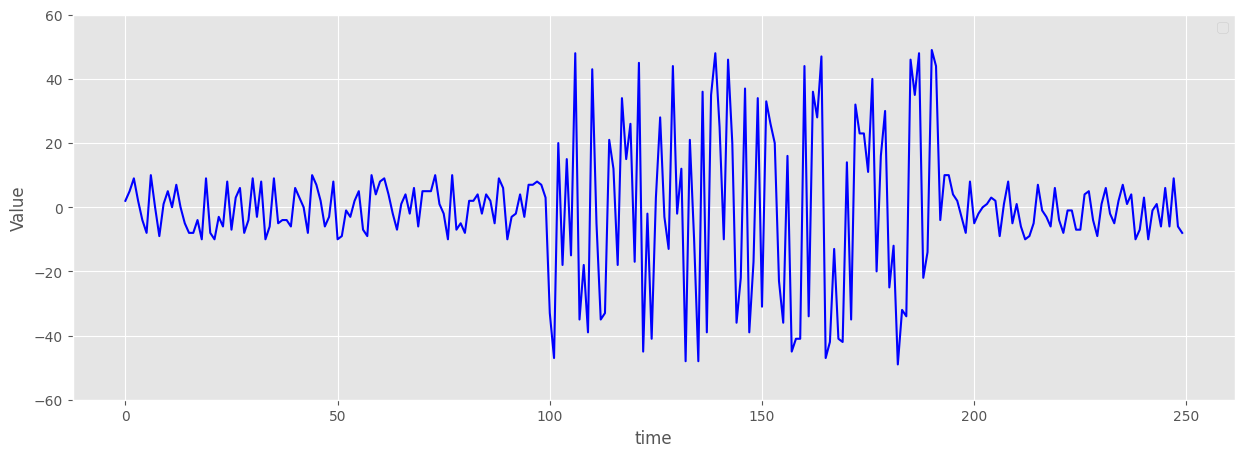

In [636]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.xlabel('time')
plt.ylabel('Value')
plt.plot(df_data, color='b')
plt.ylim(-60, 60)
plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


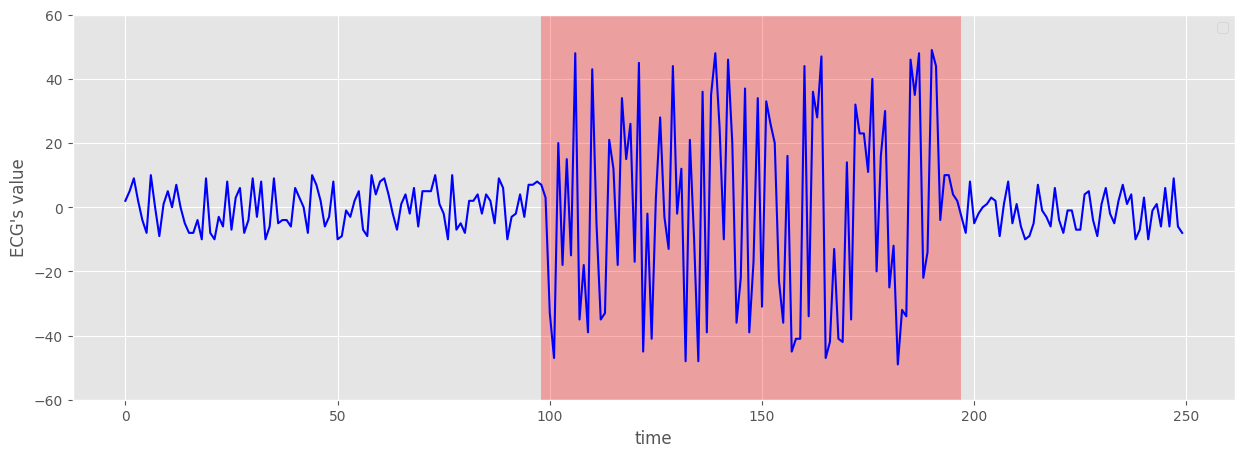

In [637]:
area_x, area_y = -60, 60

plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(df_data, color='b')
plt.ylim(-60, 60)
x = np.arange(98, 198)
plt.fill_between(x, area_x, area_y, facecolor='r', alpha=.3)
plt.legend()

plt.show()


In [638]:
# 正常データ(0-100)
normal_cycle = df_data[0:98]
# 標準化
x_normal_cycle = (normal_cycle - normal_cycle.mean()) / normal_cycle.std()
# 異常データ(98-198)
abnormal_cycle = df_data[98:198]
# 標準化
x_abnormal_cycle = (abnormal_cycle - normal_cycle.mean()) / normal_cycle.std()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


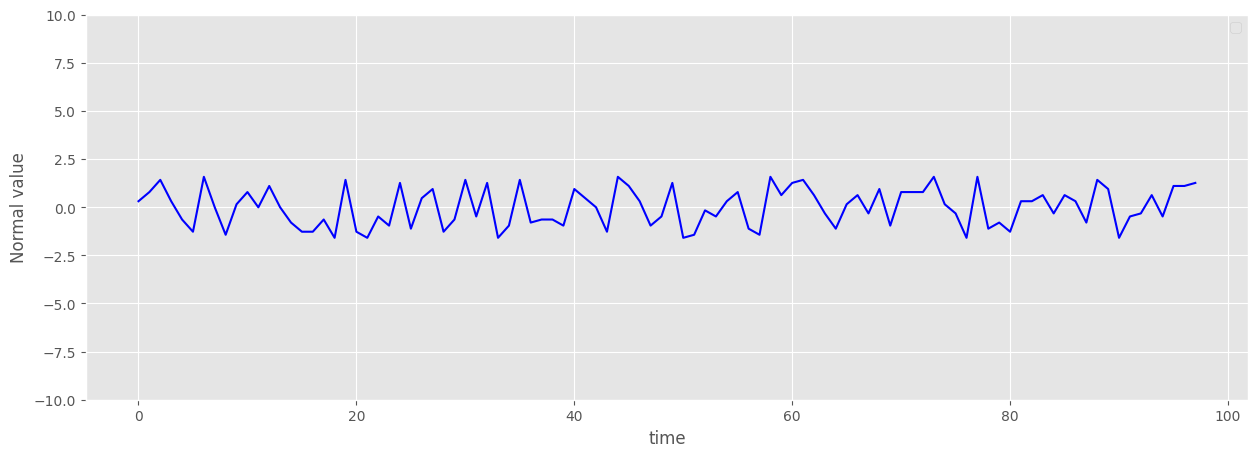

In [639]:
# 正常データplot
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.xlabel('time')
plt.ylabel('Normal value')
plt.plot(x_normal_cycle, color='b')
plt.ylim(-10, 10)
plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


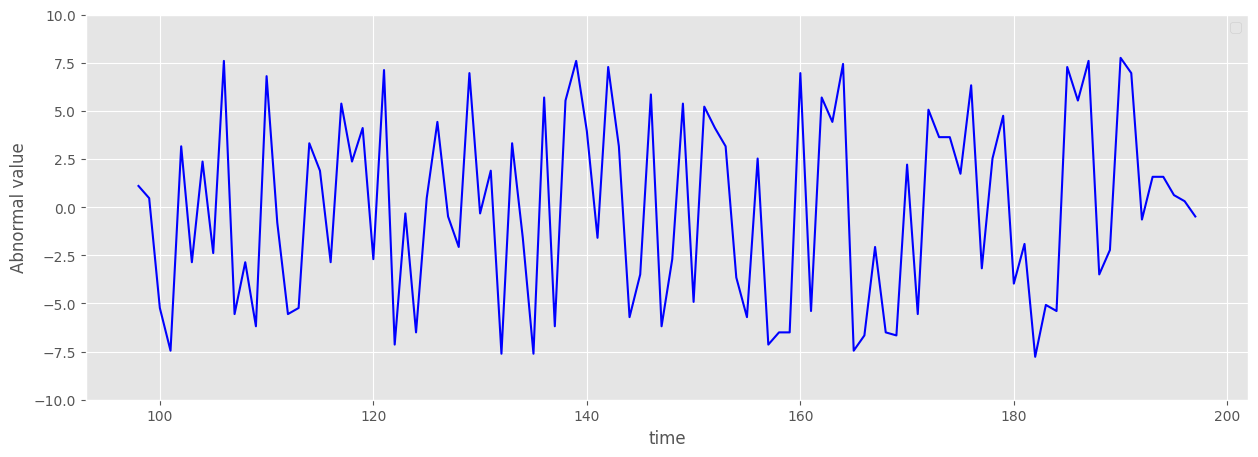

In [640]:
# 異常データ
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.xlabel('time')
plt.ylabel('Abnormal value')
plt.plot(x_abnormal_cycle, color='b')
plt.ylim(-10, 10)
plt.legend()

plt.show()


In [641]:
def create_sequences(df, time_steps):
    x = []
    for i in range(0, len(df) - time_steps + 1):
        x.append(df[i:i + time_steps].to_numpy())
    x_out = np.array(x)
    return x_out


In [642]:
time_steps = 10
x_train = create_sequences(normal_cycle, time_steps)
x_train.shape


(89, 10, 1)

In [643]:
model = tf.keras.initializers.Initializer()
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=1, activation="relu"
        ),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=1, activation="relu"
        ),
        tf.keras.layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=1, activation="relu"
        ),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=1, activation="relu"
        ),
        tf.keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_70 (Conv1D)          (None, 10, 32)            256       
                                                                 
 dropout_70 (Dropout)        (None, 10, 32)            0         
                                                                 
 conv1d_71 (Conv1D)          (None, 10, 16)            3600      
                                                                 
 conv1d_transpose_105 (Conv1  (None, 10, 16)           1808      
 DTranspose)                                                     
                                                                 
 dropout_71 (Dropout)        (None, 10, 16)            0         
                                                                 
 conv1d_transpose_106 (Conv1  (None, 10, 32)           3616      
 DTranspose)                                         

In [644]:
# 訓練
history = model.fit(
    x_train,  # 学習データ
    x_train,  # 教師データ
    validation_split=0.1,  # 検証データ比率(学習データの1割を検証データとして使用する)
    epochs=100,  # エポック数
    batch_size=8,  # バッチサイズ
    callbacks=[
        # コールバック指定
        # 5回検証Lossの改善が無かったら学習を打ち切るよう設定
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/100
10/10 [==============================] - 2s 46ms/step - loss: 38.2422 - val_loss: 28.8864
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 30.0866 - val_loss: 19.4347
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 16.6815 - val_loss: 7.3806
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 13.9106 - val_loss: 6.8180
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 10.7370 - val_loss: 8.5495
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 8.9949 - val_loss: 5.6295
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 8.5038 - val_loss: 5.4604
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 7.1980 - val_loss: 5.3306
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 6.3698 - val_loss: 4.4630
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 6.1456 - val_loss: 4.5650

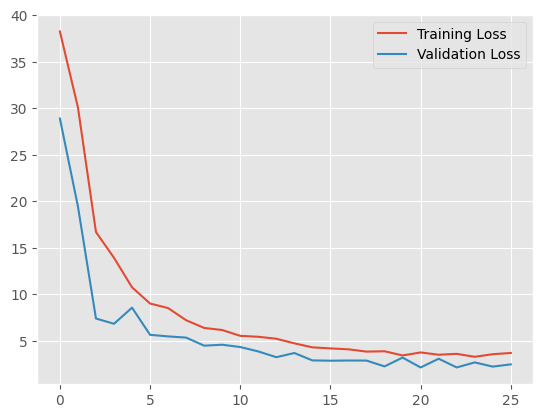

In [645]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


In [646]:
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
threshold = np.max(train_mae_loss / 10)


3/3 [==============================] - 0s 4ms/step


In [647]:
x_test = create_sequences(x_abnormal_cycle, time_steps)
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))
anomalies = test_mae_loss > threshold


3/3 [==============================] - 0s 4ms/step


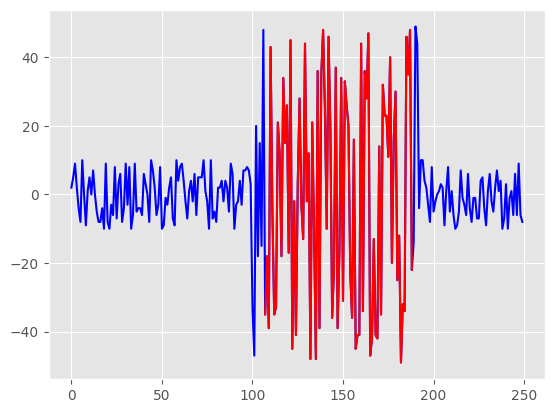

In [648]:
anomalous_data_indices = []
for data_idx in range(time_steps - 1, len(x_abnormal_cycle) - time_steps + 1):
    if np.all(anomalies[data_idx - time_steps + 1: data_idx]):
        anomalous_data_indices.append(data_idx)

df_subset = abnormal_cycle.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_data.plot(legend=False, ax=ax, color="b")
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()
